In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pre = pd.read_csv('../../baseline_data.csv')
post = pd.read_csv('../../post_data.csv')

pre['group'] = 'pre'
post['group'] = 'post'
all_data = pd.concat([pre, post], ignore_index=True)

C:\Users\Gregg\AppData\Local\Temp\ipykernel_18280\3467935809.py:3: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.pointplot(x='group', y='error', data=df_avg, hue='participant_id', palette=['lightblue'], legend=False, ax=ax)
C:\Users\Gregg\AppData\Local\Temp\ipykernel_18280\3467935809.py:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.pointplot(x='group', y='error', data=df_avg, hue='group', palette=['blue'], legend=False, dodge=True, ax=ax)


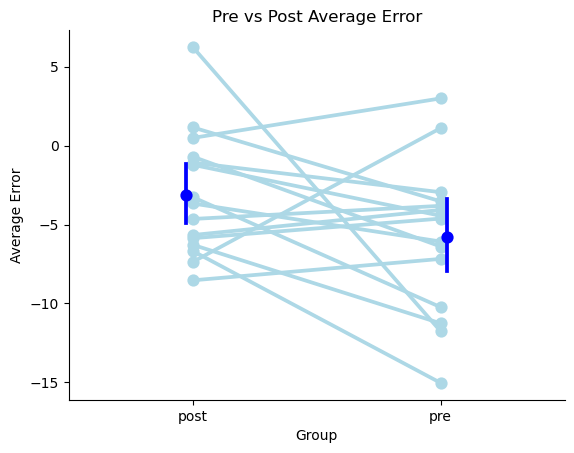

In [46]:
df_avg = all_data.groupby(['participant_id', 'group'])['error'].mean().reset_index()
fig, ax = plt.subplots()
sns.pointplot(x='group', y='error', data=df_avg, hue='participant_id', palette=['lightblue'], legend=False, ax=ax)
sns.pointplot(x='group', y='error', data=df_avg, hue='group', palette=['blue'], legend=False, dodge=True, ax=ax)
sns.despine()
ax.set_ylabel('Average Error')
ax.set_xlabel('Group')
ax.set_title('Pre vs Post Average Error')
fig.savefig('../../results/pre_vs_post_avg_error.png')


In [67]:
pre = pd.read_csv('../../baseline_data.csv')
pre_var = pre.groupby(['participant_id'])['error'].std().reset_index()
vib_error = pd.read_csv('../../summary_data.csv')
biceps_error = vib_error[vib_error['vibration'] == 'Biceps'][['participant_id', 'error']].reset_index()
triceps_error = vib_error[vib_error['vibration'] == 'Triceps'][['participant_id', 'error']].reset_index()
dual_error = vib_error[vib_error['vibration'] == 'Dual'][['participant_id', 'error']].reset_index()
all_data['pre_var'] = pre_var['error']
all_data['biceps_error'] = biceps_error['error']
all_data['triceps_error'] = triceps_error['error']
all_data['dual_error'] = dual_error['error']

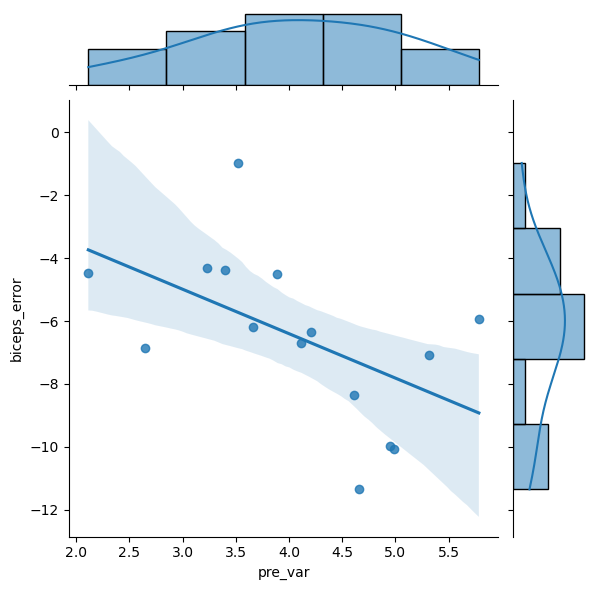

In [71]:
sns.jointplot(data=all_data, x='pre_var', y='biceps_error', kind="reg")

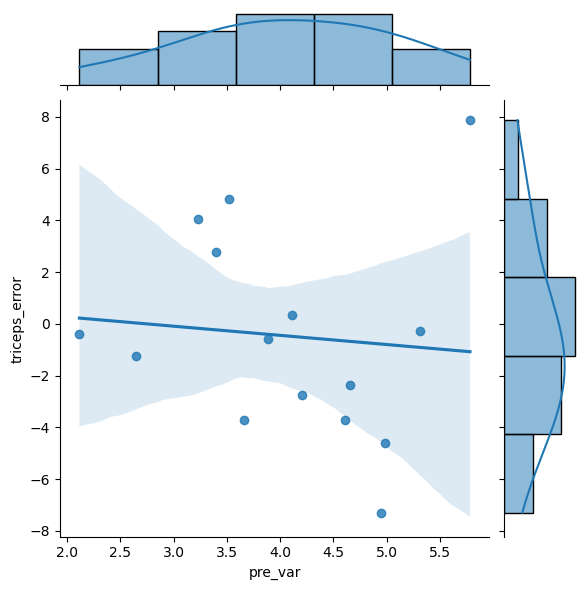

In [72]:
sns.jointplot(data=all_data, x='pre_var', y='triceps_error', kind="reg")

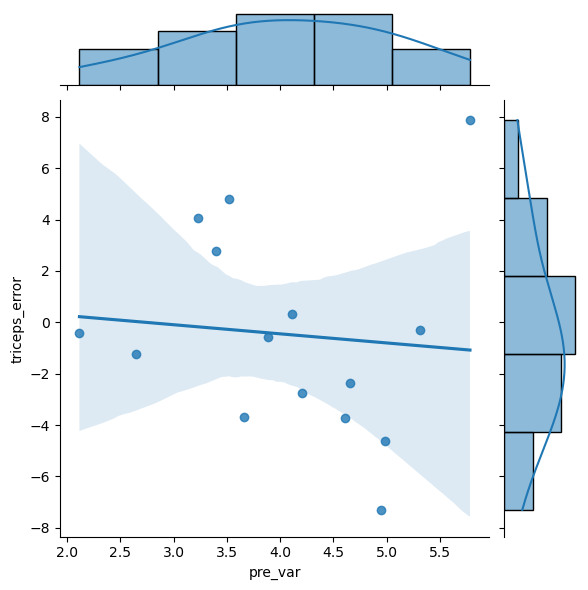

In [73]:
sns.jointplot(data=all_data, x='pre_var', y='triceps_error', kind="reg")